# Opening a Restaurant in Bratislava

<b> Important Note: </b> Please remember that this notebook <b>is not</b> the final report. The notebook is just a tool which helped me on arriving to results and to a possible conclusion, because of these, this notebook contains only the data cleaning, data analysis (visualization and results) and the already-mentioned possible conclusion. For more details and a more precise order, please refer to the final report.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In order to analyze data, I used three different datasets: 1) postalcodes_sk.xlsx (This file contains the raw data to be analyzed, it will be the starting point). 2) bratislava_pcc.xlsx (This file contains the coordinates of Bratislava City postal codes). 3) bratislava_neighborhoods.xslx (This is an appendix where it is possible to find more details about the neighborhoods of Bratislava).

Reading the first dataset:

In [2]:
raw_data = pd.read_excel('postalcodes_sk.xlsx')
raw_data.head()

,DULICA,ULICA,PSC,DPOSTA,POSTA,POZNAMKA,OBCE
0,Banská,Banská,976 32,Badín,Badín,NaN,Badín
1,Borovicová,Borovicová,976 32,Badín,Badín,NaN,Badín
2,Družstevná,Družstevná,976 32,Badín,Badín,NaN,Badín
3,Hliny,Hliny,976 32,Badín,Badín,NaN,Badín
4,Krčméryho,Krčméryho,976 32,Badín,Badín,NaN,Badín


To check the dimension of the data.

In [3]:
raw_data.shape

(10547, 7)

<p>The raw data contains information of postal codes in all Slovak territory. I decided to work only with Bratislava, thus I will create a new dataframe which contains Bratislava's city information only.</p>

### Data Cleaning

<p><b>Note: </b> For simplicity purposes, the columns of interest are <b>"OBCE"</b> (City or Town), <b>"POSTA"</b> (Which means "post office" but for this analysis it will be treated as Borough), <b>"PSC"</b> (Postal Code), and <b>"ULICA"</b> (Which means "street", but it will be treated as Neighborhood).</p>

<p>First, I created a function which let me check if there is any missing value for each column in the dataframe:</p>

In [4]:
def missingvalues(df):
    for i in df.columns:
        print (i + ": "+str(sum(df[i].isnull()))+" missing values")

Applying the function:

In [5]:
missingvalues(raw_data)

DULICA: 0 missing values
ULICA: 0 missing values
PSC: 122 missing values
DPOSTA: 122 missing values
POSTA: 122 missing values
POZNAMKA: 9885 missing values
OBCE: 1 missing values


<p>
The column "POZNAMKA" means "Notes", since this column of data does not really contain any useful information for the analysis, I decided to delete it. The columns "DULICA" and "DPOSTA" repeat the values of "ULICA" and "POSTA" respectively, therefore I also deleted them. The remaining 122 missing values in the columns "PSC", "DPOSTA", and "POSTA" correspond to 122 locations of small streets which are part of bigger neighborhoods, thus, I also eliminated them. Lastly, the last missing value for the "OBCE" column corresponds to a small street in Bratislava, for this one, I will manually add the city name "Bratislava" as its missing value.
</p>
<p>
First, eliminating the columns "POZNAMKA", "DULICA", and "DPOSTA":
</p>

In [6]:
data = raw_data.drop(columns = ['POZNAMKA', 'DULICA', 'DPOSTA'])
print(data.shape)
data.head()

(10547, 4)


,ULICA,PSC,POSTA,OBCE
0,Banská,976 32,Badín,Badín
1,Borovicová,976 32,Badín,Badín
2,Družstevná,976 32,Badín,Badín
3,Hliny,976 32,Badín,Badín
4,Krčméryho,976 32,Badín,Badín


<p>Changing the name of the columns according to what was described above:</p>

In [7]:
data = data.rename(columns = {'ULICA':'Neighborhood', 'PSC':'PostalCode', 'POSTA':'Borough', 'OBCE':'City'})
data.head()

,Neighborhood,PostalCode,Borough,City
0,Banská,976 32,Badín,Badín
1,Borovicová,976 32,Badín,Badín
2,Družstevná,976 32,Badín,Badín
3,Hliny,976 32,Badín,Badín
4,Krčméryho,976 32,Badín,Badín


<p> Now, eliminating the 122 locations: </p>

In [8]:
data.dropna(subset = ['PostalCode'], inplace = True)
data.shape

(10425, 4)

<p>Lastly, I created another function which lets me identify the row(s) with missing values:

In [9]:
def identify_missing_row(df):
    empty = df.isnull()
    row_with_nan = empty.any(axis = 1)
    empty_rows = df[row_with_nan]
    return(empty_rows)

Now using the above function:

In [10]:
identify_missing_row(data)

,Neighborhood,PostalCode,Borough,City
1844,Milana Šimečku,841 03,Bratislava 42,NaN


As it can be seen, there is only one row which has a missing value for "City", then:

In [11]:
data['City'].fillna('Bratislava', inplace = True)
data.loc[[1844]]

,Neighborhood,PostalCode,Borough,City
1844,Milana Šimečku,841 03,Bratislava 42,Bratislava


<p>For confirmation purposes I will re-check if there is any missing value in the data:</p>

In [12]:
missingvalues(data)

Neighborhood: 0 missing values
PostalCode: 0 missing values
Borough: 0 missing values
City: 0 missing values


In [13]:
data.head()

,Neighborhood,PostalCode,Borough,City
0,Banská,976 32,Badín,Badín
1,Borovicová,976 32,Badín,Badín
2,Družstevná,976 32,Badín,Badín
3,Hliny,976 32,Badín,Badín
4,Krčméryho,976 32,Badín,Badín


<p>The dataset was cleaned, but it still contains data from all Slovakia. A new dataframe will be created which contains data only from Bratislava city.</p>

In [14]:
bratislava_data = data[data['City'].str.contains('Bratislava')].reset_index(drop = True)
bratislava_data.head()

,Neighborhood,PostalCode,Borough,City
0,A. Gwerkovej,851 04,Bratislava 5,Bratislava
1,Adámiho,841 05,Bratislava 4,Bratislava
2,Agátová,841 01,Bratislava 42,Bratislava
3,Ágosta Sőtéra,851 10,Bratislava 59,Bratislava
4,Ahoj,831 02,Bratislava 3,Bratislava


In [15]:
bratislava_data.shape

(2142, 4)

<p>Now, checking how many unique Postal Codes numbers the dataframe contains:</p>

In [16]:
print('Number of unique Postal Codes: ', len(bratislava_data['PostalCode'].unique()))

Number of unique Postal Codes:  56


<p>This means the dataset can be reduced to 56 rows, for that I am assuming each Postal Code represents a neighborhood which is composed of different streets.</p>
<p>For doing so, I will first divide the dataset in two different ones (which I will later merge):</p>
<p>The first dataframe groups postal codes with their respective neighborhoods.</p>

In [17]:
first = bratislava_data.groupby('PostalCode')['Neighborhood'].apply(', '.join).reset_index()
first.head()

,PostalCode,Neighborhood
0,811 01,"Beblavého, Biela, Farská, Fialkové údolie, Fra..."
1,811 02,"Bartókova, Bôrik, Buková, Čmeľovec, Dobrovičov..."
2,811 03,"Bartoňova, Baštová, Bradlianska, Broskyňová, Č..."
3,811 04,"Banícka, Bohúňova, Boženy Němcovej, Brnianska,..."
4,811 05,"Anenská, Belopotockého, Benediktiho, Beskydská..."


<p>The second dataframe groups postal codes with their respective boroughs.</p>

In [18]:
second = bratislava_data.groupby('PostalCode')['Borough'].apply(', '.join).reset_index()
second.head()

,PostalCode,Borough
0,811 01,"Bratislava 1, Bratislava 1, Bratislava 1, Brat..."
1,811 02,"Bratislava 1, Bratislava 1, Bratislava 1, Brat..."
2,811 03,"Bratislava 1, Bratislava 1, Bratislava 1, Brat..."
3,811 04,"Bratislava 1, Bratislava 1, Bratislava 1, Brat..."
4,811 05,"Bratislava 1, Bratislava 1, Bratislava 1, Brat..."


Since the borough repeats itself many times, I will do an extra cleaning there:

In [19]:
new_borough = []
for i in range(second.shape[0]):
    cell = second.iloc[i]['Borough']
    cell = cell.split(', ')
    element = cell[0]
    borough = element
    for j in range(len(cell)):
        if element != cell[j]:
            borough = borough + ', ' + element
        else:
            pass
    new_borough.append(borough)
len(new_borough)

56

Now I will append this new borough column to the first dataframe and complete the reduced dataframe.

In [20]:
first['Borough'] = new_borough
first.head()

,PostalCode,Neighborhood,Borough
0,811 01,"Beblavého, Biela, Farská, Fialkové údolie, Fra...",Bratislava 1
1,811 02,"Bartókova, Bôrik, Buková, Čmeľovec, Dobrovičov...",Bratislava 1
2,811 03,"Bartoňova, Baštová, Bradlianska, Broskyňová, Č...",Bratislava 1
3,811 04,"Banícka, Bohúňova, Boženy Němcovej, Brnianska,...",Bratislava 1
4,811 05,"Anenská, Belopotockého, Benediktiho, Beskydská...",Bratislava 1


This new dataframe will become the data to be used for analysis.

In [21]:
bratislava_data = first
bratislava_data.head()

,PostalCode,Neighborhood,Borough
0,811 01,"Beblavého, Biela, Farská, Fialkové údolie, Fra...",Bratislava 1
1,811 02,"Bartókova, Bôrik, Buková, Čmeľovec, Dobrovičov...",Bratislava 1
2,811 03,"Bartoňova, Baštová, Bradlianska, Broskyňová, Č...",Bratislava 1
3,811 04,"Banícka, Bohúňova, Boženy Němcovej, Brnianska,...",Bratislava 1
4,811 05,"Anenská, Belopotockého, Benediktiho, Beskydská...",Bratislava 1


Lastly, it is possible to notice that the neighborhoods have very long names because they carry the names of all streets they are composed of. Therefore, for easy visualization, I will rename each neighborhood based on the following criteria:

*** Please refer to the appendix 1 for more details***

In [22]:
new_names = pd.read_excel('bratislava_neighborhoods.xlsx')
print(new_names.shape)
new_names.head()

(56, 2)


,Neighborhood,Streets
0,Neighborhood 1 (Beblavého),"Beblavého, Biela, Farská, Fialkové údolie, Fra..."
1,Neighborhood 2 (Bartókova),"Bartókova, Bôrik, Buková, Čmeľovec, Dobrovičov..."
2,Neighborhood 3 (Bartoňova),"Bartoňova, Baštová, Bradlianska, Broskyňová, Č..."
3,Neighborhood 4 (Banícka),"Banícka, Bohúňova, Boženy Němcovej, Brnianska,..."
4,Neighborhood 5 (Anenská),"Anenská, Belopotockého, Benediktiho, Beskydská..."


Getting the names of the neighborhoods based on the streets they are composed of:

In [23]:
neighborhood_new = []
for i in range(bratislava_data.shape[0]):
    old_name = bratislava_data.iloc[i]['Neighborhood']
    for j in range(new_names.shape[0]):
        new_name = new_names.iloc[j]['Streets']
        if old_name == new_name:
            neigh_name = new_names.iloc[j]['Neighborhood']
            neighborhood_new.append(neigh_name)
#neighborhood_new

Replacing the Neighborhood old names' column by the new one:

In [24]:
bratislava_data = bratislava_data.assign(Neighborhood = neighborhood_new)
bratislava_data.head()

,PostalCode,Neighborhood,Borough
0,811 01,Neighborhood 1 (Beblavého),Bratislava 1
1,811 02,Neighborhood 2 (Bartókova),Bratislava 1
2,811 03,Neighborhood 3 (Bartoňova),Bratislava 1
3,811 04,Neighborhood 4 (Banícka),Bratislava 1
4,811 05,Neighborhood 5 (Anenská),Bratislava 1


### Retrieving Neighborhood's Coordinates (Based on Postal Code)

For this part, I obtained the postal codes' coordinates from "https://www.postcodesdb.com/AlphabeticSearch.aspx?country=Slovakia&city=Bratislava" and "https://github.com/OpenDataSk/datasets/blob/master/postalcodecoordinates_sk.json". The data is the third excel file mentioned above:

In [25]:
coordinates = pd.read_excel('bratislava_pcc.xlsx')
coordinates.head()

,Postal Code,Latitude,Longitude
0,811 01,48.14527,17.10989
1,811 02,48.14687,17.09470
2,811 03,48.14808,17.10469
3,811 04,48.16131,17.09738
4,811 05,48.15561,17.10973


Extracting the latitude and longitude values and storing them in lists:

In [26]:
longitudes = []
latitudes = []
coord_list = []

for l in range(coordinates.shape[0]):
    coord_list.append(coordinates['Postal Code'][l])

for k in range(bratislava_data.shape[0]):
    pc = bratislava_data.iloc[k]['PostalCode']
    if pc in coord_list:
        pc_lat = coordinates[coordinates['Postal Code'] == pc]['Latitude']
        pc_long = coordinates[coordinates['Postal Code'] == pc]['Longitude']
        latitudes.append(pc_lat.iloc[0])
        longitudes.append(pc_long.iloc[0])
    else:
        latitudes.append(None)
        longitudes.append(None)

Checking the number of data retrieved:

In [27]:
print('Number of latitude points retrieved: ', len(latitudes))
print('Number of longitude points retrieved: ', len(longitudes))

Number of latitude points retrieved:  56
Number of longitude points retrieved:  56


Now appending these new columns to the dataset:

In [28]:
bratislava_data['Latitude'] = latitudes
bratislava_data['Longitude'] = longitudes
bratislava_data.head()

,PostalCode,Neighborhood,Borough,Latitude,Longitude
0,811 01,Neighborhood 1 (Beblavého),Bratislava 1,48.14527,17.10989
1,811 02,Neighborhood 2 (Bartókova),Bratislava 1,48.14687,17.09470
2,811 03,Neighborhood 3 (Bartoňova),Bratislava 1,48.14808,17.10469
3,811 04,Neighborhood 4 (Banícka),Bratislava 1,48.16131,17.09738
4,811 05,Neighborhood 5 (Anenská),Bratislava 1,48.15561,17.10973


Just to confirm everything is correct, I will check if no data is missing in this main dataset:

In [29]:
missingvalues(bratislava_data)

PostalCode: 0 missing values
Neighborhood: 0 missing values
Borough: 0 missing values
Latitude: 2 missing values
Longitude: 2 missing values


Curiously, there are two missing values, let's find out which ones they are:

In [30]:
identify_missing_row(bratislava_data)

,PostalCode,Neighborhood,Borough,Latitude,Longitude
32,832 02,Neighborhood 33 (Krahulčia),Bratislava 3,NaN,NaN
45,84103,Neighborhood 46 (Milana Šimečku),Bratislava 42,NaN,NaN


At first glance, it is possible to notice that there is a mistake on writing the Postal Code for row 45, it should be written as "841 03", this will be manually corrected instead of removing the row. For row 32, I did some research and found out that there was a mistake on the number of Postal Code, instead "832 02" it should be "831 02", this will also be corrected manually:

In [31]:
bratislava_data.replace(to_replace = '832 02', value = '831 02', inplace = True)
bratislava_data.replace(to_replace = '84103', value = '841 03', inplace = True)

Re-displaying the rows with missing values:

In [32]:
identify_missing_row(bratislava_data)

,PostalCode,Neighborhood,Borough,Latitude,Longitude
32,831 02,Neighborhood 33 (Krahulčia),Bratislava 3,NaN,NaN
45,841 03,Neighborhood 46 (Milana Šimečku),Bratislava 42,NaN,NaN


Repeating the process of getting Latitude and Longitude for all the Postal Codes and replace the columns in the main dataset:

In [33]:
longitudes = []
latitudes = []
coord_list = []

for l in range(coordinates.shape[0]):
    coord_list.append(coordinates['Postal Code'][l])

for k in range(bratislava_data.shape[0]):
    pc = bratislava_data.iloc[k]['PostalCode']
    if pc in coord_list:
        pc_lat = coordinates[coordinates['Postal Code'] == pc]['Latitude']
        pc_long = coordinates[coordinates['Postal Code'] == pc]['Longitude']
        latitudes.append(pc_lat.iloc[0])
        longitudes.append(pc_long.iloc[0])
    else:
        latitudes.append(None)
        longitudes.append(None)

In [34]:
bratislava_data = bratislava_data.drop(columns = ['Latitude', 'Longitude'])
bratislava_data['Latitude'] = latitudes
bratislava_data['Longitude'] = longitudes
bratislava_data.head()

,PostalCode,Neighborhood,Borough,Latitude,Longitude
0,811 01,Neighborhood 1 (Beblavého),Bratislava 1,48.14527,17.10989
1,811 02,Neighborhood 2 (Bartókova),Bratislava 1,48.14687,17.09470
2,811 03,Neighborhood 3 (Bartoňova),Bratislava 1,48.14808,17.10469
3,811 04,Neighborhood 4 (Banícka),Bratislava 1,48.16131,17.09738
4,811 05,Neighborhood 5 (Anenská),Bratislava 1,48.15561,17.10973


Once more, I will verify if there are no missing data values:

In [35]:
missingvalues(bratislava_data)

PostalCode: 0 missing values
Neighborhood: 0 missing values
Borough: 0 missing values
Latitude: 0 missing values
Longitude: 0 missing values


Now I will proceed with the Data Analysis.

## Data Analysis

### Data Visualization

I will first use geopy library to get the latitude and longitude values of Bratislava City.

In [36]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.52         |     pyhd8ed1ab_0          35 KB  conda-forge
    geopy-2.2.0                |     pyhd8ed1ab_0          67 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         102 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.52-pyhd8ed1ab_0
  geopy              conda-forge/noarch::geopy-2.2.0-pyhd8ed1ab_0



geographiclib-1.52   | 35 KB     | ##################################### | 100% 
geopy-2.2.0          | 67 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transa

In [37]:
address = 'Bratislava, BA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bratislava City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bratislava City are 48.1516988, 17.1093063.


Now I will create a function which allows me to draw maps:

In [38]:
def draw_map(data, lati, longi, zoom = 11):
    mapa = folium.Map(location = [lati, longi], zoom_start = zoom)

    # add markers to map
    for lat, lng, borough, neighborhood in zip(data['Latitude'], data['Longitude'], data['Borough'], data['Neighborhood']):
        label = '{}, {}'.format(neighborhood, borough)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius = 5,
            popup = label,
            color = 'blue',
            fill = True,
            fill_color = '#3186cc',
            fill_opacity = 0.7,
            parse_html = False).add_to(mapa)
    return(mapa)

Creating a map of Bratislava City with neighborhoods.

In [39]:
draw_map(bratislava_data, latitude, longitude)

Now I will introduce my Foursquare Credentials and Version:

In [40]:
CLIENT_ID = 'TUZZBR55QKQXFIKSHLV0CNCDWSA5FZXG5AJQUTNLHNMOHCJJ' # your Foursquare ID
CLIENT_SECRET = 'OXETA5HRDHNEOGUINWBU0PH4NXYZ4KNRB03XMJWD0QCKTG02' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

Checking the details of the first neighborhood:

In [41]:
bratislava_data.loc[0, 'Neighborhood']

'Neighborhood 1 (Beblavého)'

Getting the neighborhood's latitude and longitude values:

In [42]:
neighborhood_latitude = bratislava_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = bratislava_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = bratislava_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Neighborhood 1 (Beblavého) are 48.14527, 17.10989.


Now, I will get the top 100 venues that are in this first Neighborhood within a radius of 500 meters.

In [43]:
limit = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=TUZZBR55QKQXFIKSHLV0CNCDWSA5FZXG5AJQUTNLHNMOHCJJ&client_secret=OXETA5HRDHNEOGUINWBU0PH4NXYZ4KNRB03XMJWD0QCKTG02&v=20180605&ll=48.14527,17.10989&radius=500&limit=100'

In [44]:
results = requests.get(url).json()

Creating a function that extracts the category of the venue:

In [45]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now I will clean the json and structure it into a pandas dataframe.

In [46]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Soho,Thai Restaurant,48.144105,17.111880
1,Stará tržnica,Event Space,48.144719,17.111225
2,Vespa Caffeteria,Café,48.143714,17.111012
3,Martinus,Bookstore,48.147157,17.110099
4,Viecha malých vinárov,Wine Bar,48.144707,17.111148


In [47]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


Now I will create a function to repeat the same process to all the neighborhoods in Bratislava.

In [48]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Using the above function and creating a new dataframe called bratislava_venues:

In [49]:
bratislava_venues = getNearbyVenues(names = bratislava_data['Neighborhood'],
                                   latitudes = bratislava_data['Latitude'],
                                   longitudes = bratislava_data['Longitude']
                                  )

Neighborhood 1 (Beblavého)
Neighborhood 2 (Bartókova)
Neighborhood 3 (Bartoňova)
Neighborhood 4 (Banícka)
Neighborhood 5 (Anenská)
Neighborhood 6 (Andreja Plávku)
Neighborhood 7 (Americké námestie)
Neighborhood 8 (Cintorínska)
Neighborhood 9 (Alžbetínska)
Neighborhood 10 (Astrová)
Neighborhood 11 (Astronomická)
Neighborhood 12 (Albrechtova)
Neighborhood 13 (Ambrušova)
Neighborhood 14 (Alejová)
Neighborhood 15 (Achátová)
Neighborhood 16 (Amarelková)
Neighborhood 17 (Azovská)
Neighborhood 18 (Alejová)
Neighborhood 19 (Horné Židiny)
Neighborhood 20 (Kamilková)
Neighborhood 21 (Báger)
Neighborhood 22 (Kamzík)
Neighborhood 23 (Ambrova)
Neighborhood 24 (Ahoj)
Neighborhood 25 (Brezovská)
Neighborhood 26 (Bajkalská)
Neighborhood 27 (Albánska)
Neighborhood 28 (Baničova)
Neighborhood 29 (Černockého)
Neighborhood 30 (Burgundská)
Neighborhood 31 (Cyprichova)
Neighborhood 32 (Hlinícka)
Neighborhood 33 (Krahulčia)
Neighborhood 34 (Hodonínska)
Neighborhood 35 (Podkerepušky)
Neighborhood 36 (Glavica)


In [50]:
print(bratislava_venues.shape)
bratislava_venues.head()

(1194, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Neighborhood 1 (Beblavého),48.14527,17.10989,Soho,48.144105,17.111880,Thai Restaurant
1,Neighborhood 1 (Beblavého),48.14527,17.10989,Stará tržnica,48.144719,17.111225,Event Space
2,Neighborhood 1 (Beblavého),48.14527,17.10989,Vespa Caffeteria,48.143714,17.111012,Café
3,Neighborhood 1 (Beblavého),48.14527,17.10989,Martinus,48.147157,17.110099,Bookstore
4,Neighborhood 1 (Beblavého),48.14527,17.10989,Viecha malých vinárov,48.144707,17.111148,Wine Bar


Checking how many venues were returned for each neighborhood:

In [51]:
bratislava_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Neighborhood 1 (Beblavého),100,100,100,100,100,100
Neighborhood 10 (Astrová),17,17,17,17,17,17
Neighborhood 11 (Astronomická),27,27,27,27,27,27
Neighborhood 12 (Albrechtova),12,12,12,12,12,12
Neighborhood 13 (Ambrušova),11,11,11,11,11,11
Neighborhood 14 (Alejová),7,7,7,7,7,7
Neighborhood 15 (Achátová),5,5,5,5,5,5
Neighborhood 16 (Amarelková),9,9,9,9,9,9
Neighborhood 17 (Azovská),40,40,40,40,40,40


Now I will find out how many unique categories can be curated from all the returned venues:

In [52]:
print('There are {} uniques categories.'.format(len(bratislava_venues['Venue Category'].unique())))

There are 183 uniques categories.


Analyzing each neighborhood.

In [53]:
# one hot encoding
bratislava_onehot = pd.get_dummies(bratislava_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bratislava_onehot['Neighborhood'] = bratislava_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bratislava_onehot.columns[-1]] + list(bratislava_onehot.columns[:-1])
bratislava_onehot = bratislava_onehot[fixed_columns]

bratislava_onehot.head()

,Yoga Studio,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bakery,...,Train,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Vineyard,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
bratislava_onehot.shape

(1194, 183)

In [55]:
bratislava_grouped = bratislava_onehot.groupby('Neighborhood').mean().reset_index()

In [56]:
bratislava_grouped.shape

(53, 183)

Next, I will print each neighborhood along with the top 5 most common venues:

In [57]:
num_top_venues = 5

for hood in bratislava_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bratislava_grouped[bratislava_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Neighborhood 1 (Beblavého)----
         venue  freq
0         Café  0.11
1          Bar  0.07
2  Coffee Shop  0.05
3     Wine Bar  0.05
4          Pub  0.04


----Neighborhood 10 (Astrová)----
         venue  freq
0         Café  0.12
1   Restaurant  0.12
2  Pizza Place  0.12
3    Drugstore  0.06
4          Pub  0.06


----Neighborhood 11 (Astronomická)----
               venue  freq
0               Café  0.07
1         Donut Shop  0.04
2    Other Nightlife  0.04
3  Paella Restaurant  0.04
4       Burger Joint  0.04


----Neighborhood 12 (Albrechtova)----
                         venue  freq
0                  Pizza Place  0.17
1                   Playground  0.08
2  Eastern European Restaurant  0.08
3                    Gastropub  0.08
4                         Café  0.08


----Neighborhood 13 (Ambrušova)----
                         venue  freq
0                Grocery Store  0.09
1                        Hotel  0.09
2  Eastern European Restaurant  0.09
3                 Dessert 

After this, I will introduce the data into a dataframe.

In [58]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [59]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bratislava_grouped['Neighborhood']

for ind in np.arange(bratislava_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bratislava_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Neighborhood 1 (Beblavého),Café,Bar,Wine Bar,Coffee Shop,Italian Restaurant,Pub,Cocktail Bar,Beer Bar,Hotel,Brewery
1,Neighborhood 10 (Astrová),Restaurant,Pizza Place,Café,Eastern European Restaurant,Chinese Restaurant,Coffee Shop,Gastropub,Salad Place,Pub,Drugstore
2,Neighborhood 11 (Astronomická),Café,Hotel,Beer Store,Bistro,Donut Shop,Burger Joint,Burrito Place,Bus Stop,Other Nightlife,Flower Shop
3,Neighborhood 12 (Albrechtova),Pizza Place,Eastern European Restaurant,Pub,Italian Restaurant,Café,Hotel,Tram Station,Chinese Restaurant,Gastropub,Playground
4,Neighborhood 13 (Ambrušova),Dessert Shop,Italian Restaurant,Bus Stop,Hotel,Restaurant,Park,Eastern European Restaurant,Playground,Café,Grocery Store


## Cluster Neighborhoods
I will start by running k-means to cluster the neighborhood into 5 clusters.

In [ ]:
# set number of clusters
kclusters = 5

bratislava_grouped_clustering = bratislava_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bratislava_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

Next, I will use the Elbow Method to check for the optimal K:

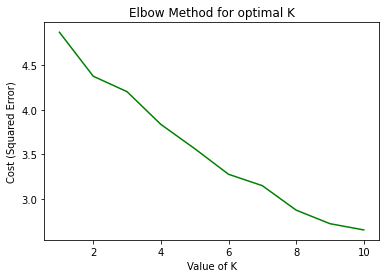

In [61]:
cost = []
for i in range(1, 11):
    KM = KMeans(n_clusters = i, random_state=0)
    KM.fit(bratislava_grouped_clustering) #*
    cost.append(KM.inertia_)
# Plot the elbow
plt.plot(range(1,11), cost, color = 'g')
plt.xlabel('Value of K')
plt.ylabel('Cost (Squared Error)')
plt.title('Elbow Method for optimal K')
plt.show()

The elbow will probably show a better shape with a K value greater than 10, this might be because all neighborhoods are very different from each other. However, it is possible to notice a change for K = 2 and for K = 6; since K = 2 is a small number of clusters, I decided to proceed the analysis with K = 6.

In [62]:
# set number of clusters
kclusters = 6

bratislava_grouped_clustering = bratislava_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bratislava_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 5, 5, 0, 5, 1, 1, 1, 5, 5, 3, 1, 0, 5, 1, 1, 0, 5, 1, 1,
       2, 2, 2, 5, 1, 1, 0, 1, 5, 5, 1, 5, 5, 4, 1, 5, 5, 1, 5, 1, 0, 5,
       1, 5, 5, 5, 5, 1, 1, 1, 1], dtype=int32)

Now I will create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [63]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bratislava_merged = bratislava_data

# merge bratislava_grouped with bratislava_data to add latitude/longitude for each neighborhood
bratislava_merged = bratislava_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bratislava_merged.head() # check the last columns!

,PostalCode,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,811 01,Neighborhood 1 (Beblavého),Bratislava 1,48.14527,17.10989,1.0,Café,Bar,Wine Bar,Coffee Shop,Italian Restaurant,Pub,Brewery,Cocktail Bar,Hotel,Bistro
1,811 02,Neighborhood 2 (Bartókova),Bratislava 1,48.14687,17.09470,5.0,Hotel,Restaurant,Pet Café,Café,Social Club,Chinese Restaurant,Bistro,Russian Restaurant,Beer Garden,Tea Room
2,811 03,Neighborhood 3 (Bartoňova),Bratislava 1,48.14808,17.10469,1.0,Coffee Shop,Hotel,Café,Pub,Creperie,Bookstore,Bar,Wine Bar,Brewery,Burger Joint
3,811 04,Neighborhood 4 (Banícka),Bratislava 1,48.16131,17.09738,5.0,Bar,Food & Drink Shop,Dance Studio,Bus Stop,Beer Garden,Pharmacy,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop,French Restaurant
4,811 05,Neighborhood 5 (Anenská),Bratislava 1,48.15561,17.10973,1.0,Hostel,Restaurant,Bar,Hotel,Pub,Café,Indian Restaurant,Brewery,Spa,Music Venue


Checking if there is any missing value:

In [64]:
missingvalues(bratislava_merged)

PostalCode: 0 missing values
Neighborhood: 0 missing values
Borough: 0 missing values
Latitude: 0 missing values
Longitude: 0 missing values
Cluster Labels: 3 missing values
1st Most Common Venue: 3 missing values
2nd Most Common Venue: 3 missing values
3rd Most Common Venue: 3 missing values
4th Most Common Venue: 3 missing values
5th Most Common Venue: 3 missing values
6th Most Common Venue: 3 missing values
7th Most Common Venue: 3 missing values
8th Most Common Venue: 3 missing values
9th Most Common Venue: 3 missing values
10th Most Common Venue: 3 missing values


Eventually there are three rows with missing values, let's find out which rows I have to fix:

In [65]:
identify_missing_row(bratislava_merged)

,PostalCode,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,831 02,Neighborhood 24 (Ahoj),Bratislava 3,48.18667,17.2351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,831 02,Neighborhood 33 (Krahulčia),Bratislava 3,48.18667,17.2351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,850 09,Neighborhood 48 (Hraničný priechod-Čuňovo diaľ...,Bratislava 59,48.04160,17.1243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In this case, I could not retrieve any value for those Neighborhoods, this could be because of a lack of information that the API retrieved, thus I will just simply eliminate these rows:

In [66]:
bratislava_merged.dropna(axis = 0, inplace = True)

In [67]:
bratislava_merged.shape

(53, 16)

Because of the presence of empty spaces in the eliminated rows (NaN values), the Cluster Label acquired a float type. Thus, before visualizing the data, the type of the labels will be changed to integer:

In [68]:
bratislava_merged = bratislava_merged.astype({'Cluster Labels':int})
bratislava_merged.head()

,PostalCode,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,811 01,Neighborhood 1 (Beblavého),Bratislava 1,48.14527,17.10989,1,Café,Bar,Wine Bar,Coffee Shop,Italian Restaurant,Pub,Brewery,Cocktail Bar,Hotel,Bistro
1,811 02,Neighborhood 2 (Bartókova),Bratislava 1,48.14687,17.09470,5,Hotel,Restaurant,Pet Café,Café,Social Club,Chinese Restaurant,Bistro,Russian Restaurant,Beer Garden,Tea Room
2,811 03,Neighborhood 3 (Bartoňova),Bratislava 1,48.14808,17.10469,1,Coffee Shop,Hotel,Café,Pub,Creperie,Bookstore,Bar,Wine Bar,Brewery,Burger Joint
3,811 04,Neighborhood 4 (Banícka),Bratislava 1,48.16131,17.09738,5,Bar,Food & Drink Shop,Dance Studio,Bus Stop,Beer Garden,Pharmacy,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop,French Restaurant
4,811 05,Neighborhood 5 (Anenská),Bratislava 1,48.15561,17.10973,1,Hostel,Restaurant,Bar,Hotel,Pub,Café,Indian Restaurant,Brewery,Spa,Music Venue


Now, let's visualize the clusters:

In [69]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start = 11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bratislava_merged['Latitude'], bratislava_merged['Longitude'], bratislava_merged['Neighborhood'], bratislava_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examining Clusters

Cluster 1:

In [70]:
clusters = [] # I am creating a list of clusters for further analysis
cluster1 = bratislava_merged.loc[bratislava_merged['Cluster Labels'] == 0, bratislava_merged.columns[[1] + list(range(5, bratislava_merged.shape[1]))]]
clusters.append(cluster1)
cluster1

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Neighborhood 14 (Alejová),0,Gastropub,Restaurant,Asian Restaurant,Eastern European Restaurant,Bus Stop,Ice Cream Shop,Playground,Flower Shop,Furniture / Home Store,Frozen Yogurt Shop
21,Neighborhood 22 (Kamzík),0,Snack Place,Restaurant,Scenic Lookout,Other Great Outdoors,Racetrack,Athletics & Sports,Hotel,Pub,Eastern European Restaurant,Trail
26,Neighborhood 27 (Albánska),0,Restaurant,Playground,Dessert Shop,Pizza Place,Italian Restaurant,Park,Frozen Yogurt Shop,French Restaurant,Fountain,Food Truck
36,Neighborhood 37 (Agátová),0,Restaurant,Eastern European Restaurant,Supermarket,Diner,Italian Restaurant,Gastropub,Asian Restaurant,Czech Restaurant,Tram Station,Flower Shop
49,Neighborhood 50 (Ambroseho),0,Gastropub,Restaurant,Bus Stop,Bowling Alley,Pub,Ice Cream Shop,Bakery,Flower Shop,Furniture / Home Store,Frozen Yogurt Shop


Cluster 2:

In [71]:
cluster2 = bratislava_merged.loc[bratislava_merged['Cluster Labels'] == 1, bratislava_merged.columns[[1] + list(range(5, bratislava_merged.shape[1]))]]
clusters.append(cluster2)
cluster2

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Neighborhood 1 (Beblavého),1,Café,Bar,Wine Bar,Coffee Shop,Italian Restaurant,Pub,Brewery,Cocktail Bar,Hotel,Bistro
2,Neighborhood 3 (Bartoňova),1,Coffee Shop,Hotel,Café,Pub,Creperie,Bookstore,Bar,Wine Bar,Brewery,Burger Joint
4,Neighborhood 5 (Anenská),1,Hostel,Restaurant,Bar,Hotel,Pub,Café,Indian Restaurant,Brewery,Spa,Music Venue
5,Neighborhood 6 (Andreja Plávku),1,Café,Coffee Shop,Bar,Pub,Hotel,Burger Joint,Vegetarian / Vegan Restaurant,Creperie,Bookstore,Design Studio
6,Neighborhood 7 (Americké námestie),1,Café,Coffee Shop,Gym / Fitness Center,Indian Restaurant,Tea Room,Radio Station,Restaurant,Farmers Market,Concert Hall,Flower Shop
7,Neighborhood 8 (Cintorínska),1,Café,Bakery,Playground,Bistro,Brewery,Plaza,Breakfast Spot,Coffee Shop,Clothing Store,Nightclub
8,Neighborhood 9 (Alžbetínska),1,Café,Italian Restaurant,Coffee Shop,Clothing Store,Burger Joint,Health Food Store,French Restaurant,Bistro,Electronics Store,Indie Movie Theater
9,Neighborhood 10 (Astrová),1,Café,Restaurant,Pizza Place,Japanese Restaurant,Gym,Drugstore,Eastern European Restaurant,Rental Car Location,Salad Place,Pharmacy
10,Neighborhood 11 (Astronomická),1,Café,Italian Restaurant,Belgian Restaurant,Buffet,Poke Place,Burrito Place,Bus Stop,Furniture / Home Store,Paella Restaurant,Coffee Shop
15,Neighborhood 16 (Amarelková),1,Pizza Place,Slovak Restaurant,Bowling Alley,Electronics Store,Ice Cream Shop,Grocery Store,Food Court,Cocktail Bar,Gym / Fitness Center,Frozen Yogurt Shop


Cluster 3:

In [72]:
cluster3 = bratislava_merged.loc[bratislava_merged['Cluster Labels'] == 2, bratislava_merged.columns[[1] + list(range(5, bratislava_merged.shape[1]))]]
clusters.append(cluster3)
cluster3

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Neighborhood 30 (Burgundská),2,Restaurant,Asian Restaurant,Supermarket,Bistro,Motorcycle Shop,Women's Store,Flower Shop,Furniture / Home Store,Frozen Yogurt Shop,French Restaurant
30,Neighborhood 31 (Cyprichova),2,Motorcycle Shop,Auto Garage,Bistro,Pizza Place,Supermarket,Bookstore,Slovak Restaurant,Restaurant,Ice Cream Shop,Asian Restaurant
31,Neighborhood 32 (Hlinícka),2,Pharmacy,Asian Restaurant,Supermarket,Tram Station,Bistro,Motorcycle Shop,Flower Shop,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop


Cluster 4:

In [73]:
cluster4 = bratislava_merged.loc[bratislava_merged['Cluster Labels'] == 3, bratislava_merged.columns[[1] + list(range(5, bratislava_merged.shape[1]))]]
clusters.append(cluster4)
cluster4

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Neighborhood 20 (Kamilková),3,Vineyard,Plaza,Women's Store,Fast Food Restaurant,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop,French Restaurant,Fountain,Food Truck


Cluster 5:

In [74]:
cluster5 = bratislava_merged.loc[bratislava_merged['Cluster Labels'] == 4, bratislava_merged.columns[[1] + list(range(5, bratislava_merged.shape[1]))]]
clusters.append(cluster5)
cluster5

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
42,Neighborhood 43 (Brežná),4,Rental Car Location,Park,Bus Stop,Health Food Store,Garden,Furniture / Home Store,Frozen Yogurt Shop,French Restaurant,Fountain,Food Truck


In [75]:
cluster6 = bratislava_merged.loc[bratislava_merged['Cluster Labels'] == 5, bratislava_merged.columns[[1] + list(range(5, bratislava_merged.shape[1]))]]
clusters.append(cluster6)
cluster6

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Neighborhood 2 (Bartókova),5,Hotel,Restaurant,Pet Café,Café,Social Club,Chinese Restaurant,Bistro,Russian Restaurant,Beer Garden,Tea Room
3,Neighborhood 4 (Banícka),5,Bar,Food & Drink Shop,Dance Studio,Bus Stop,Beer Garden,Pharmacy,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop,French Restaurant
11,Neighborhood 12 (Albrechtova),5,Pizza Place,Italian Restaurant,Eastern European Restaurant,Pub,Bus Stop,Hotel,Tram Station,Gastropub,Cafeteria,Playground
12,Neighborhood 13 (Ambrušova),5,Dessert Shop,Hotel,Bus Stop,Café,Grocery Store,Tennis Court,Eastern European Restaurant,Playground,Park,Italian Restaurant
14,Neighborhood 15 (Achátová),5,Lawyer,Restaurant,Bus Stop,Tapas Restaurant,Plaza,Café,Women's Store,Flower Shop,Frozen Yogurt Shop,French Restaurant
18,Neighborhood 19 (Horné Židiny),5,Wine Bar,Eastern European Restaurant,Bus Stop,Train Station,Women's Store,Flower Shop,Gaming Cafe,Furniture / Home Store,Frozen Yogurt Shop,French Restaurant
22,Neighborhood 23 (Ambrova),5,Grocery Store,Bus Stop,Hotel,Pharmacy,Pizza Place,Basketball Court,Bar,Food & Drink Shop,Café,Dance Studio
27,Neighborhood 28 (Baničova),5,Bus Stop,Italian Restaurant,Playground,Park,Supermarket,Café,Skating Rink,Dessert Shop,Eastern European Restaurant,Restaurant
33,Neighborhood 34 (Hodonínska),5,Chinese Restaurant,Fabric Shop,Tram Station,Coffee Shop,Pizza Place,Women's Store,Furniture / Home Store,Frozen Yogurt Shop,French Restaurant,Fountain
38,Neighborhood 39 (Bakošova),5,Pizza Place,Pharmacy,Restaurant,Gastropub,Supermarket,Bus Stop,Hockey Arena,Plaza,Café,Fast Food Restaurant


### Results

In this section I will analyze the results obtained after clustering. Also, some graphs will be plotted for better understanding and to consider some important points.

First, I will re-display the neighborhoods with their number of venues in descending order:

In [76]:
neighborhood_count = bratislava_venues.groupby('Neighborhood').count().reset_index()
neighborhood_count = neighborhood_count.sort_values(by='Venue', ascending = False)
neighborhood_count

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Neighborhood 1 (Beblavého),100,100,100,100,100,100
13,Neighborhood 21 (Báger),79,79,79,79,79,79
27,Neighborhood 36 (Glavica),79,79,79,79,79,79
26,Neighborhood 35 (Podkerepušky),74,74,74,74,74,74
52,Neighborhood 9 (Alžbetínska),73,73,73,73,73,73
51,Neighborhood 8 (Cintorínska),59,59,59,59,59,59
21,Neighborhood 3 (Bartoňova),52,52,52,52,52,52
41,Neighborhood 5 (Anenská),47,47,47,47,47,47
49,Neighborhood 6 (Andreja Plávku),44,44,44,44,44,44
16,Neighborhood 25 (Brezovská),44,44,44,44,44,44


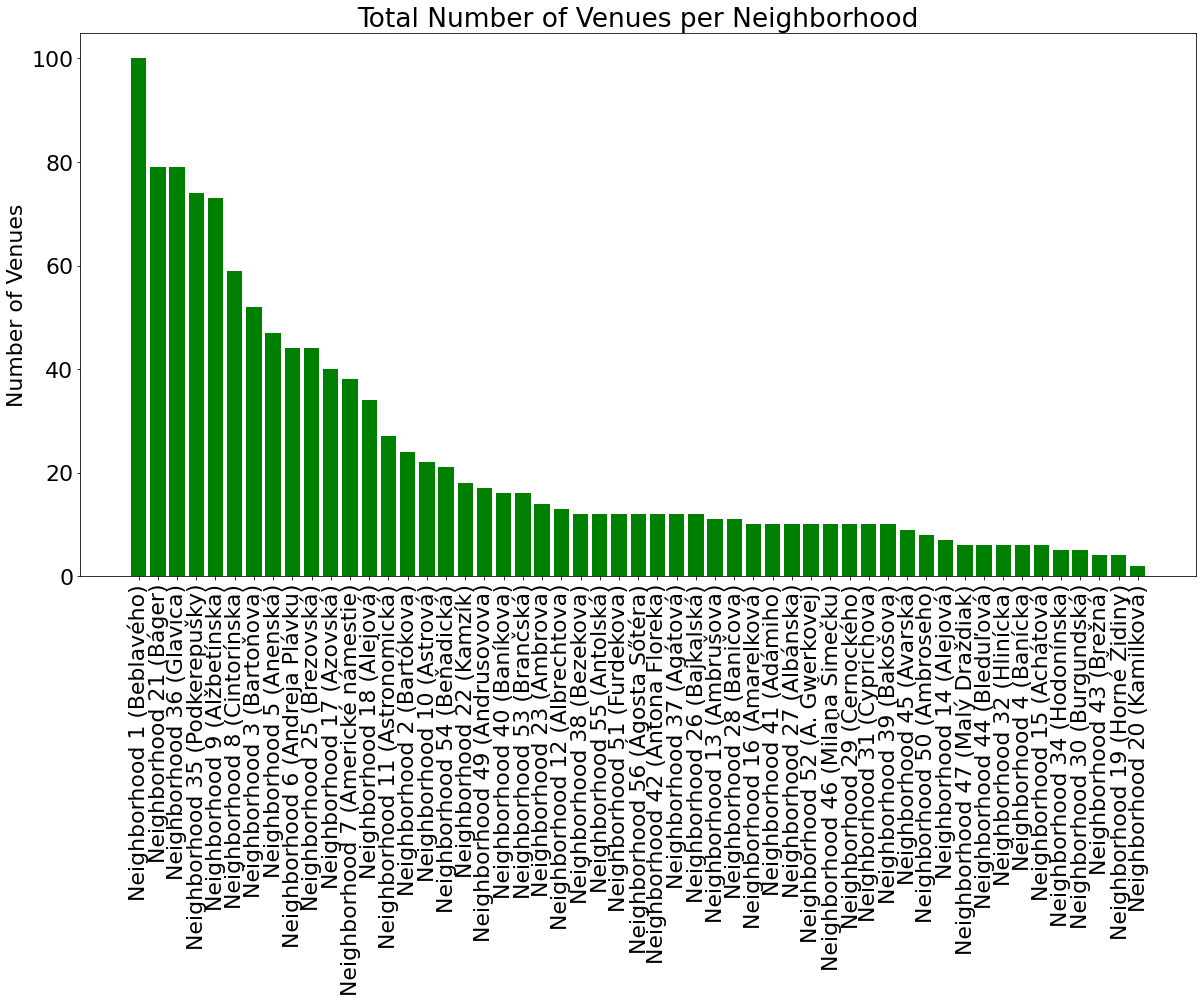

In [78]:
x = neighborhood_count['Neighborhood']
y = neighborhood_count['Venue']
n = np.arange(len(x))

plt.bar(n, y, align = 'center', color = ['green'])
plt.xticks(n, x)
plt.ylabel('Number of Venues')
plt.title('Total Number of Venues per Neighborhood')
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"]=(20, 10)
plt.rcParams.update({'font.size': 22})

plt.show()

The first 5 neighborhoods show more than 60 venues, let's focus on them.

I will find in which cluster these neighborhoods are at.

In [79]:
first_5 = neighborhood_count.iloc[0:5]['Neighborhood']
number = []
for a in range(first_5.shape[0]):
    number.append(first_5.iloc[a])

In [80]:
for i in range(len(number)):
    for j in range(len(clusters)):
        for k in range(clusters[j].shape[0]):
            neigh = clusters[j].iloc[k]['Neighborhood']
            if number[i] == neigh:
                print(number[i], 'is located in Cluster ', j+1)
            else:
                pass

Neighborhood 1 (Beblavého) is located in Cluster  2
Neighborhood 21 (Báger) is located in Cluster  2
Neighborhood 36 (Glavica) is located in Cluster  2
Neighborhood 35 (Podkerepušky) is located in Cluster  2
Neighborhood 9 (Alžbetínska) is located in Cluster  2


As it is possible to see above, my model grouped the neighborhoods with more venues in the same cluster. This makes me think that, the more venues in an area, the more influx of people there. This could be a good hint on where I could open my restaurant. In order to confirm this, let's see how many and what kind of venues each cluster contains:

Creating a function which will display simple bar charts for each cluster. Note that I am considering only the 1st Most Common Venue:

In [81]:
import random
def barchart(df_cluster):
    freq = df_cluster.groupby('1st Most Common Venue').count()
    freq = freq[['Neighborhood']]
    freq.rename(columns={'Neighborhood':'Venues'}, inplace = True)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    r = colors[random.randint(0, 9)]
    ax = freq.plot.bar(color = r, xlabel = 'Type of Venue', ylabel = 'Number of Venues')

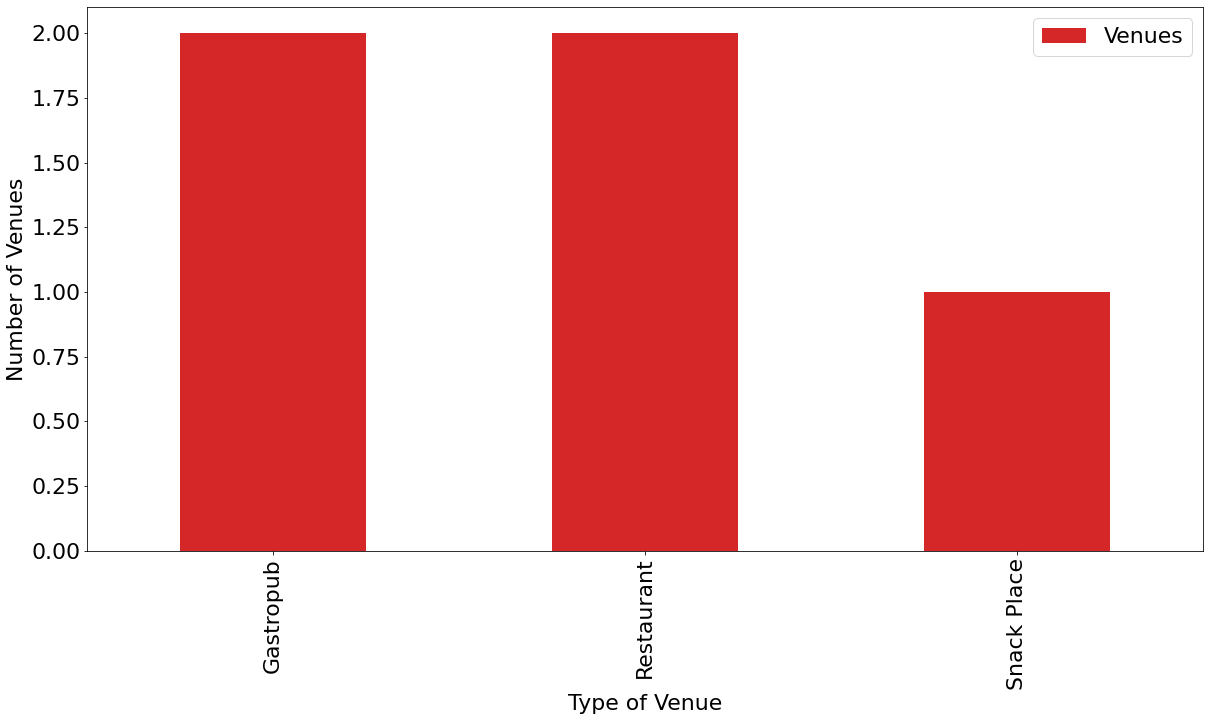

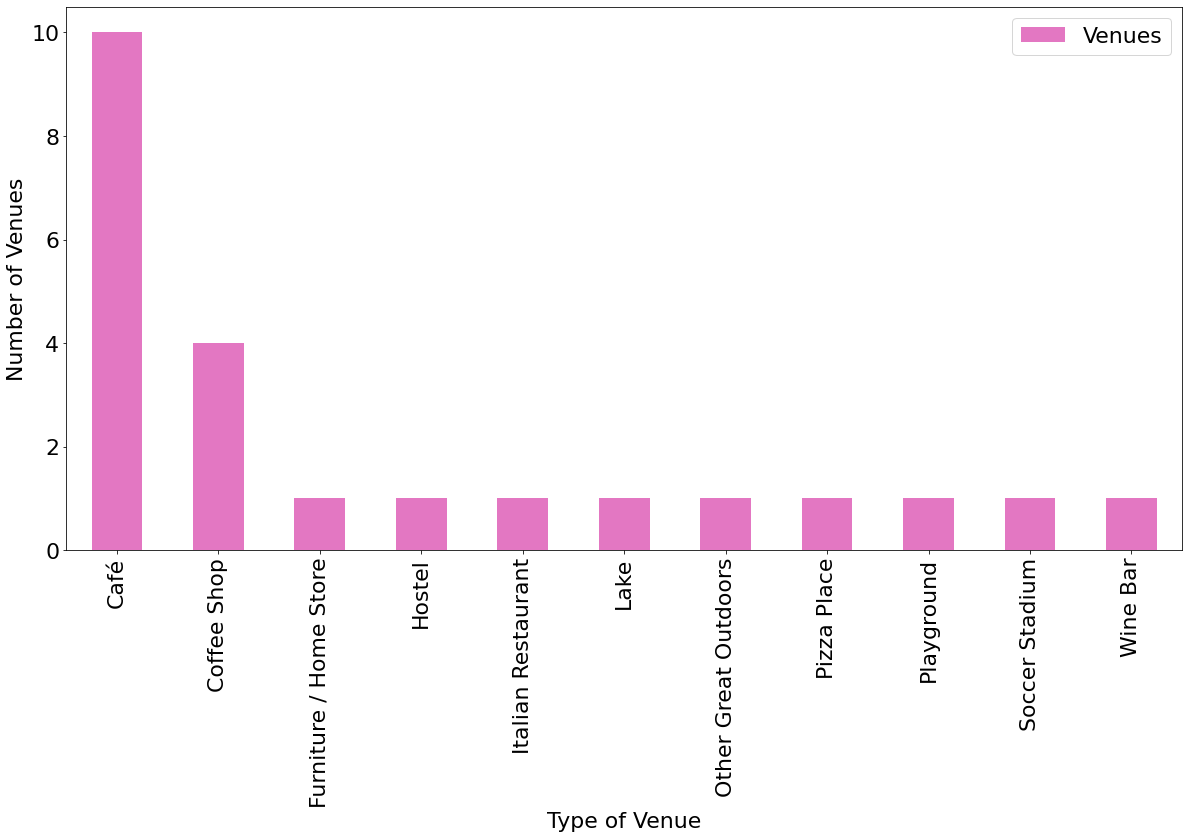

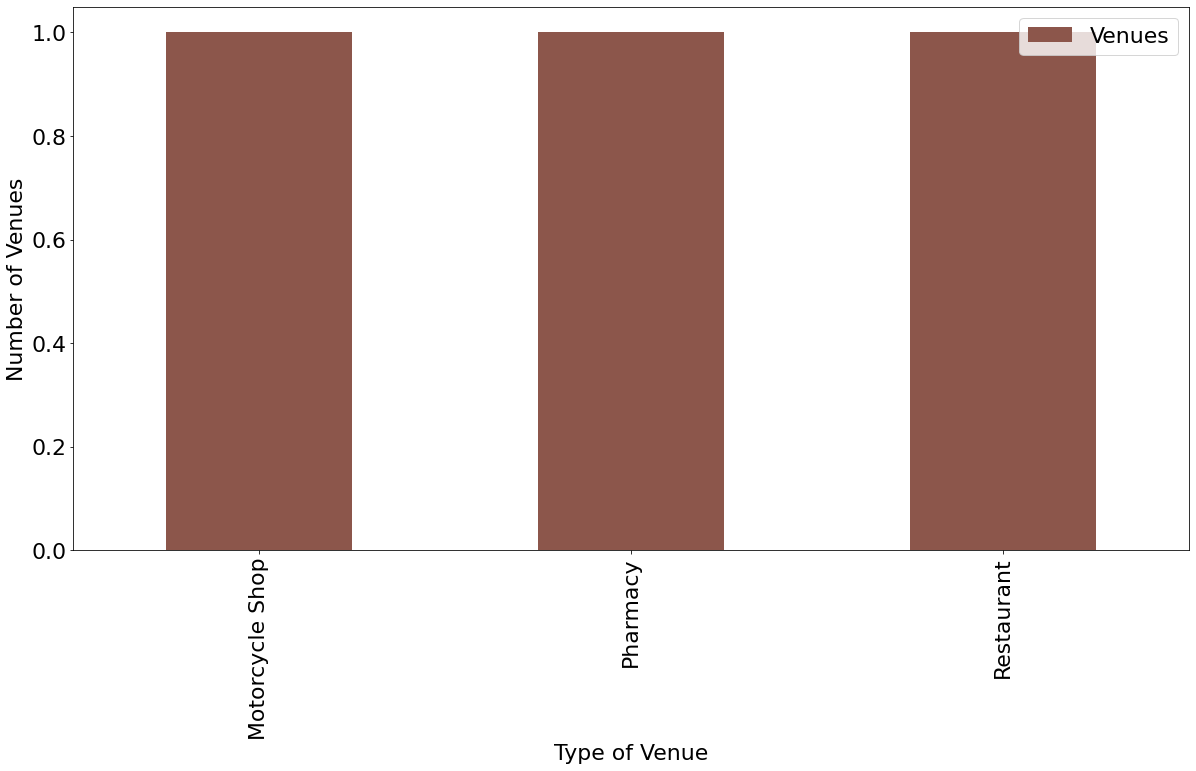

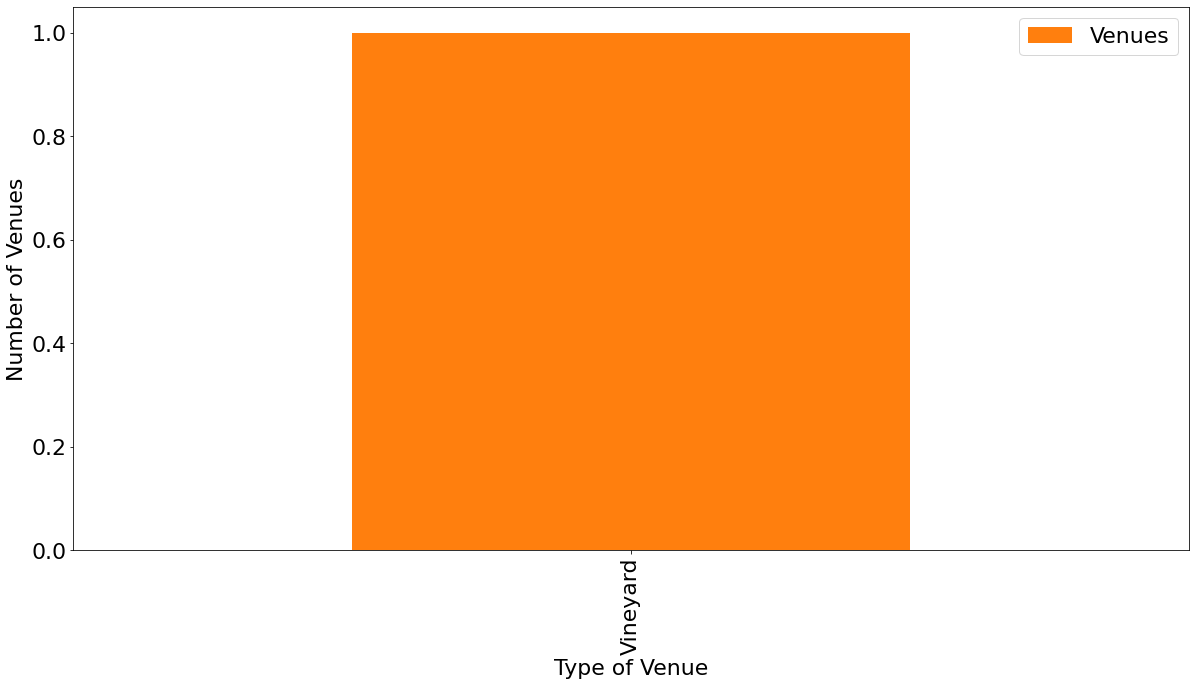

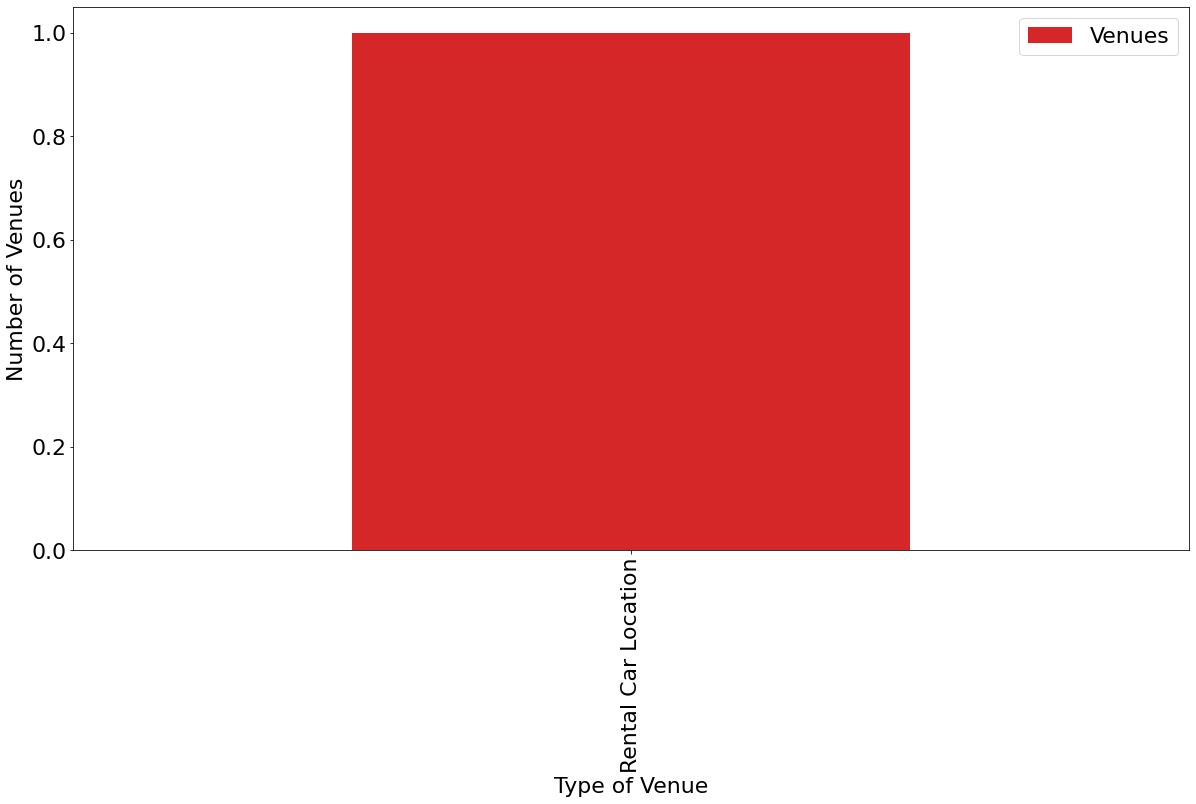

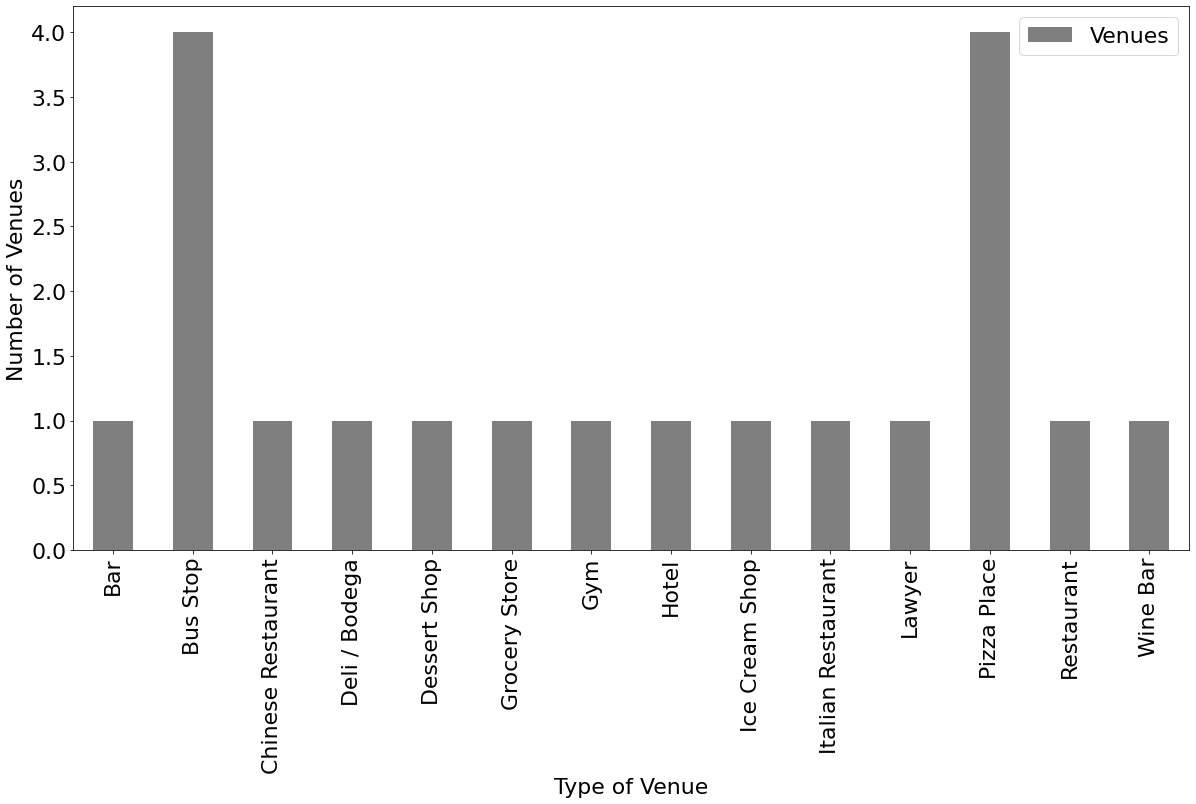

In [82]:
for i in range(len(clusters)):
    barchart(clusters[i])

To consider all venues in each cluster, I will create a function which gives me back a dataframe which contains the type of venue and its frequency for each cluster:

In [83]:
def venues_frequency(df):
    freq_df = df.stack().value_counts().to_frame()
    eliminator = []
    for i in range(freq_df.shape[0]):
        for j in range(len(clusters)):
            label = freq_df.index[i]
            if label == j:
                if i in eliminator:
                    pass
                else:
                    eliminator.append(i)
            elif 'Neighborhood' in str(label):
                if i in eliminator:
                    pass
                else:
                    eliminator.append(i)
            else:
                pass
    c = 0
    for j in range(len(eliminator)):
        el = freq_df.index[eliminator[j]-c]
        freq_df = freq_df.drop([el])
        c = c + 1
    freq_df.rename(columns = {0:'Frequency'}, inplace = True)
    return(freq_df)

### Cluster 1

Let's first apply the function and check how many venues in total the first cluster has:

In [84]:
f = venues_frequency(cluster1)
sum1 = f.sum()[0]
print('The total number of venues in this cluster is:', sum1)

The total number of venues in this cluster is: 50


It has 50 venues in total, now let's check the first 10 more common venues in this cluster:

<AxesSubplot:xlabel='Venue Type', ylabel='Number of Venues'>

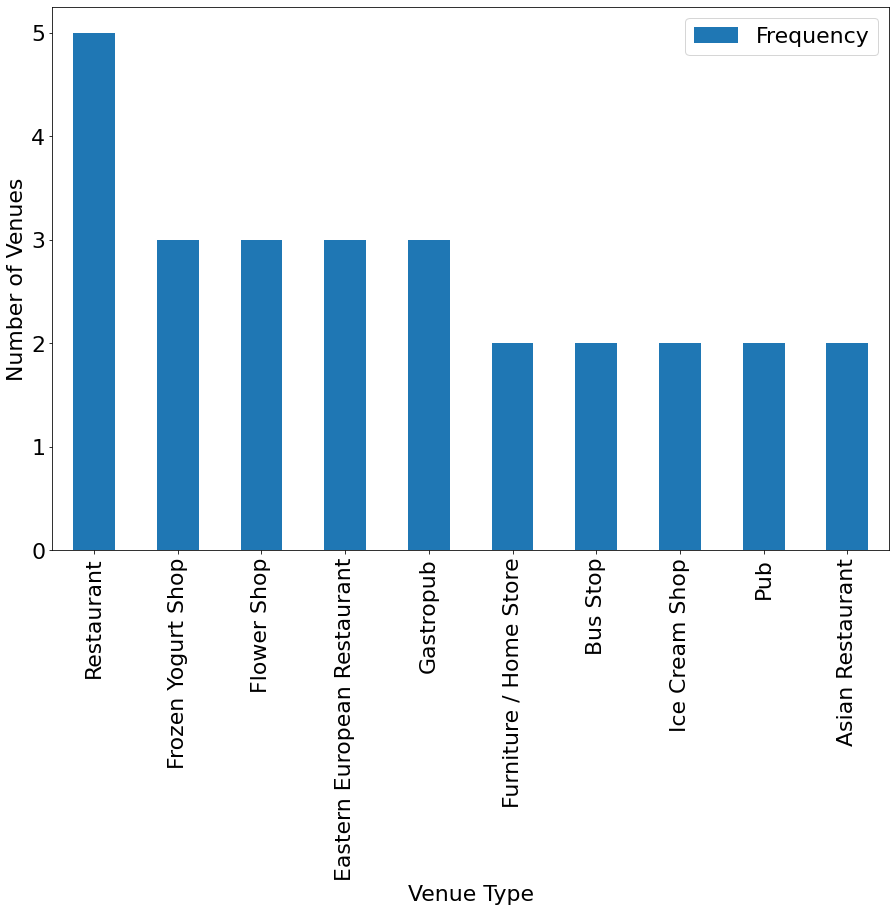

In [85]:
f.head(10).plot(kind = 'bar', figsize=[15,10], xlabel = 'Venue Type', ylabel = 'Number of Venues')

I will repeat this process for the remaining 5 clusters.

### Cluster 2

The total number of venues in this cluster is: 230


<AxesSubplot:xlabel='Venue Type', ylabel='Number of Venues'>

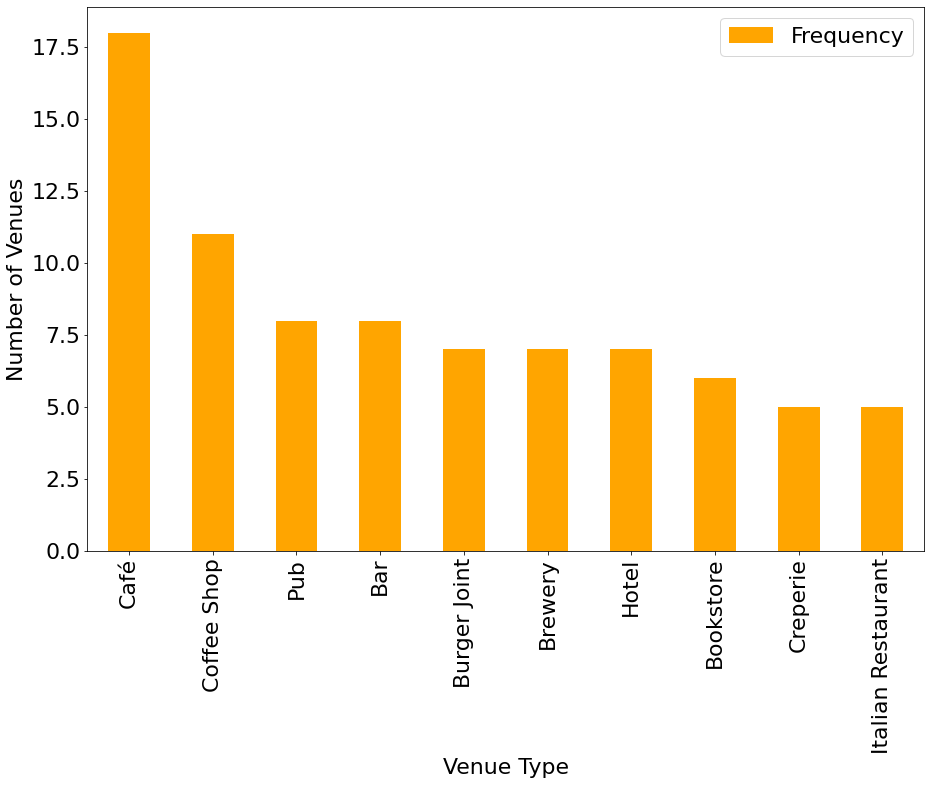

In [86]:
f = venues_frequency(cluster2)
sum2 = f.sum()[0]
print('The total number of venues in this cluster is:', sum2)
f.head(10).plot(kind = 'bar', figsize=[15,10], xlabel = 'Venue Type', ylabel = 'Number of Venues', color = 'orange')

### Cluster 3

The total number of venues in this cluster is: 30


<AxesSubplot:xlabel='Venue Type', ylabel='Number of Venues'>

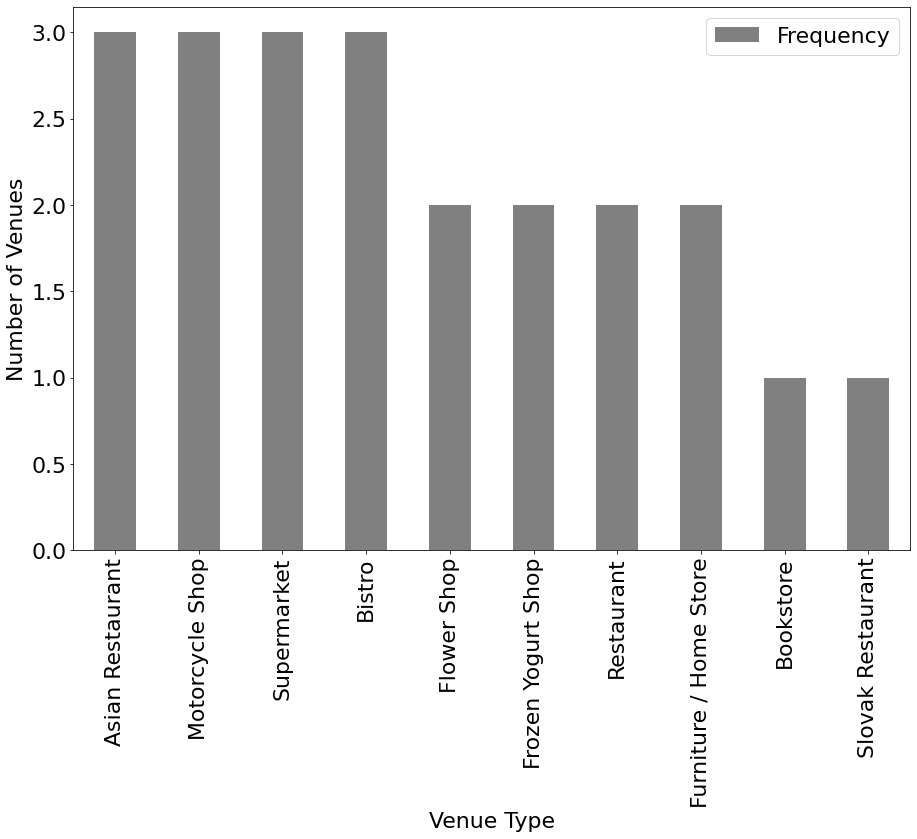

In [87]:
f = venues_frequency(cluster3)
sum3 = f.sum()[0]
print('The total number of venues in this cluster is:', sum3)
f.head(10).plot(kind = 'bar', figsize=[15,10], xlabel = 'Venue Type', ylabel = 'Number of Venues', color = 'gray')

### Cluster 4

The total number of venues in this cluster is: 10


<AxesSubplot:xlabel='Venue Type', ylabel='Number of Venues'>

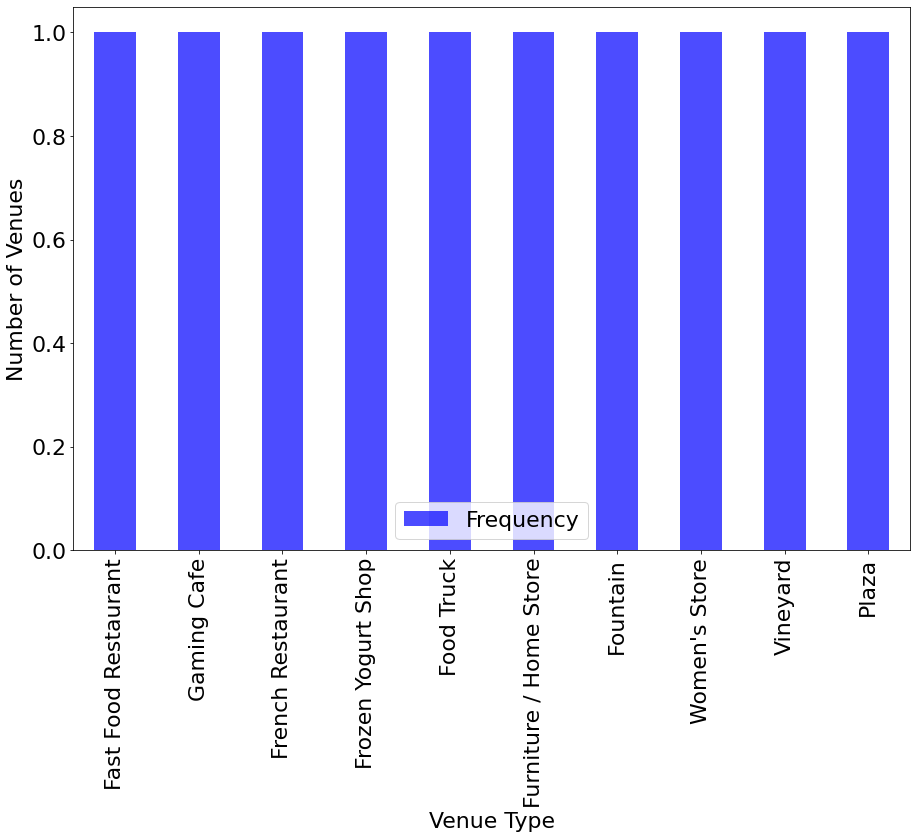

In [88]:
f = venues_frequency(cluster4)
sum4 = f.sum()[0]
print('The total number of venues in this cluster is:', sum4)
f.head(10).plot(kind = 'bar', figsize=[15,10], xlabel = 'Venue Type', ylabel = 'Number of Venues', alpha = 0.7, color = 'blue')

### Cluster 5

The total number of venues in this cluster is: 10


<AxesSubplot:xlabel='Venue Type', ylabel='Number of Venues'>

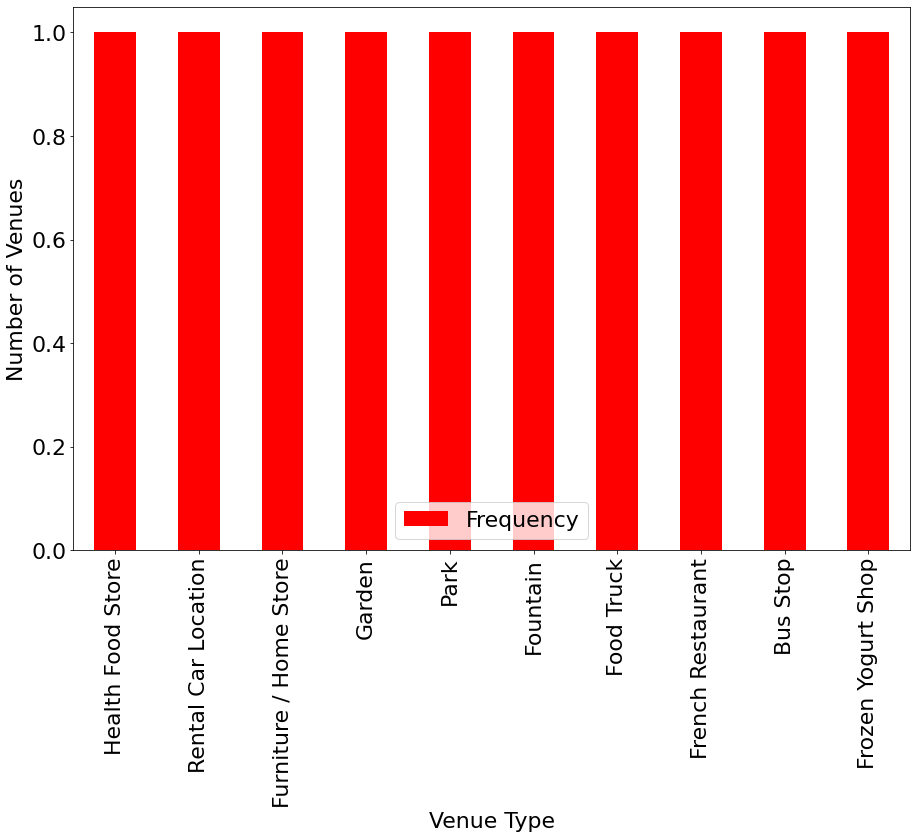

In [89]:
f = venues_frequency(cluster5)
sum5 = f.sum()[0]
print('The total number of venues in this cluster is:', sum5)
f.head(10).plot(kind = 'bar', figsize=[15,10], xlabel = 'Venue Type', ylabel = 'Number of Venues', color = 'red')

### Cluster 6

The total number of venues in this cluster is: 200


<AxesSubplot:xlabel='Venue Type', ylabel='Number of Venues'>

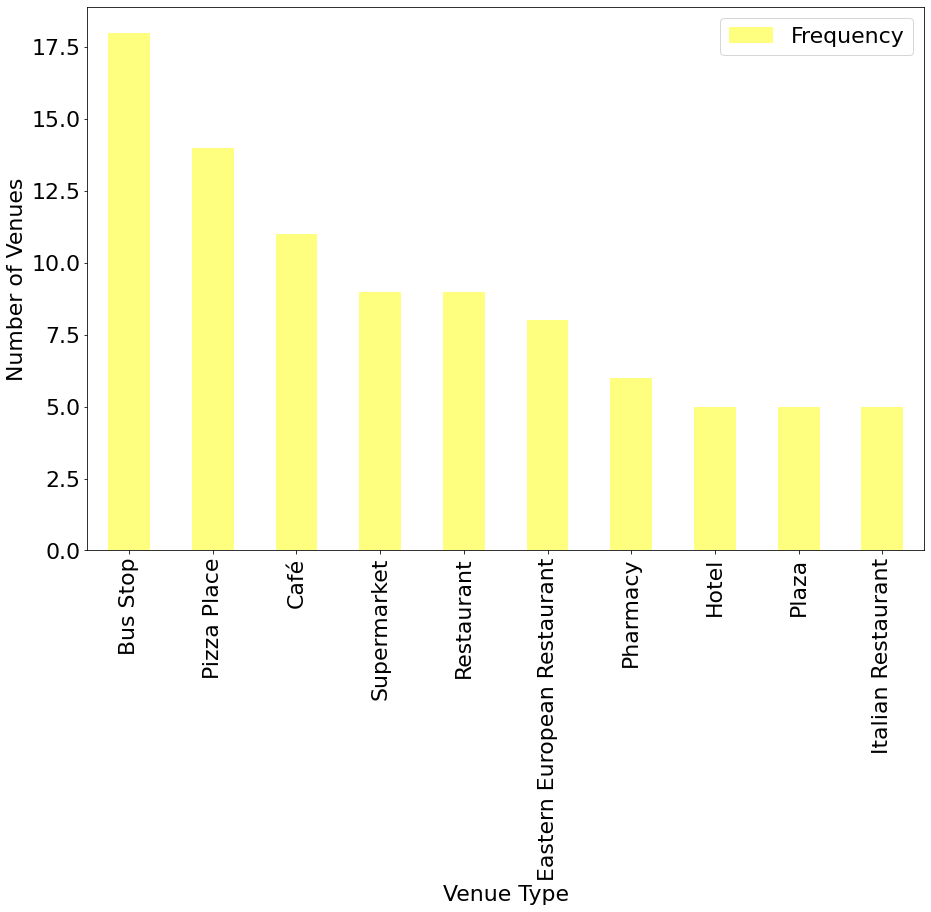

In [90]:
f = venues_frequency(cluster6)
sum6 = f.sum()[0]
print('The total number of venues in this cluster is:', sum6)
f.head(10).plot(kind = 'bar', figsize=[15,10], xlabel = 'Venue Type', ylabel = 'Number of Venues', alpha = 0.5, color = 'yellow')

Let's summarize the number of venues per cluster in the following pie chart:

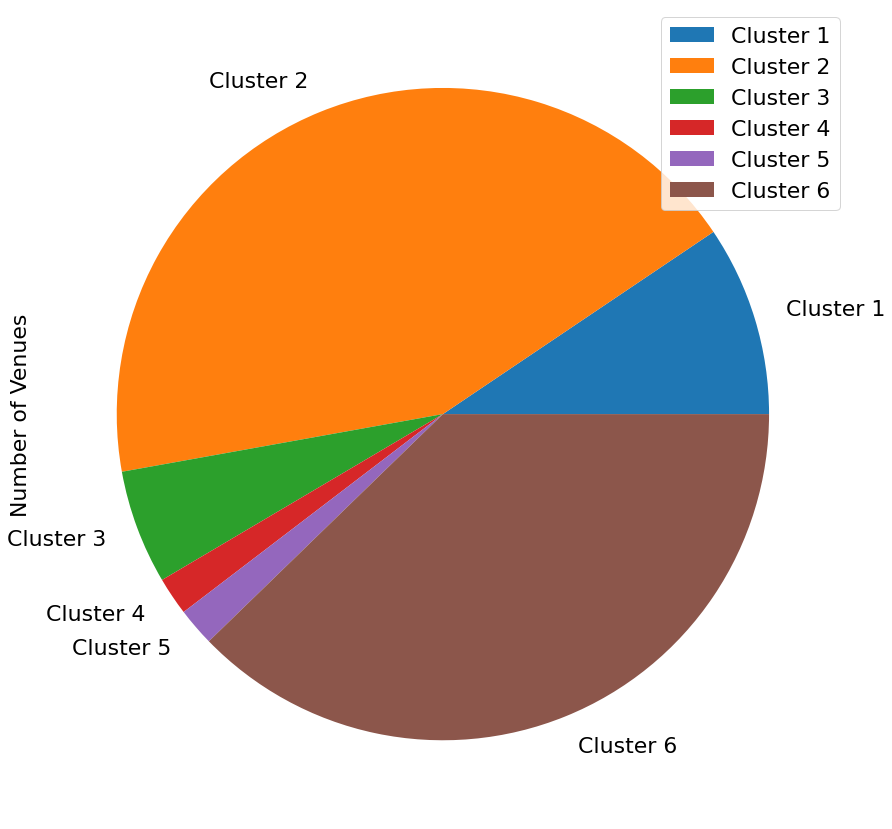

In [91]:
piechart = pd.DataFrame({'Number of Venues':[sum1, sum2, sum3, sum4, sum5, sum6]}, index = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6'])
plot = piechart.plot.pie(y = 'Number of Venues', figsize = (15, 15))

It is easily to notice that the two clusters which have the biggest number of venues are Cluster 2 and Cluster 6.

Let's start by analyzing the venues in Cluster 6: As it is possible to see in the above graph, Cluster 6 contains 18 Bus Stop venues, followed by Pizza Place, Cafes, Supermarket and Restaurants. Let's see the dataframe:

In [92]:
f = venues_frequency(cluster6)
f.head(10)

,Frequency
Bus Stop,18
Pizza Place,14
Café,11
Supermarket,9
Restaurant,9
Eastern European Restaurant,8
Pharmacy,6
Hotel,5
Plaza,5
Italian Restaurant,5


To visualize in the map where the cluster is, I will create a new function that retrieves the coordinates of the neighborhoods in each cluster:

In [93]:
def df_cluster(df):
    neighborhoods = []
    latitud = []
    longitud = []
    bor = []
    for i in range(df.shape[0]):
        neighborhoods.append(df.iloc[i]['Neighborhood'])

    indices = bratislava_data.index
    for j in range(df.shape[0]):
        index = indices[bratislava_data['Neighborhood'] == neighborhoods[j]]
        lat = bratislava_data.iloc[index]['Latitude']
        latitud.append(lat.iloc[0])
        long = bratislava_data.iloc[index]['Longitude']
        longitud.append(long.iloc[0])
        b = bratislava_data.iloc[index]['Borough']
        bor.append(b.iloc[0])

    dic = {'Neighborhood':neighborhoods, 'Borough':bor, 'Latitude':latitud, 'Longitude':longitud}
    new_df = pd.DataFrame(dic)
    return(new_df)

In [94]:
cluster6_data = df_cluster(cluster6)
cluster6_data.shape

(20, 4)

Drawing the map for Cluster 6:

In [95]:
draw_map(cluster6_data, latitude, longitude, 12)

Similarly, for Cluster 2:

In [96]:
f = venues_frequency(cluster2)
f.head(10)

,Frequency
Café,18
Coffee Shop,11
Pub,8
Bar,8
Burger Joint,7
Brewery,7
Hotel,7
Bookstore,6
Creperie,5
Italian Restaurant,5


In [97]:
cluster2_data = df_cluster(cluster2)
cluster2_data.shape

(23, 4)

In [98]:
draw_map(cluster2_data, latitude, longitude, 12)

### Possible Conclusion

As it can be seen from the results of Cluster 2 and Cluster 6, there are more restaurants in Cluster 6 neighborhoods, thus competence will be higher. Cluster 2 has more cafes, pubs and bars, thus probably, any neighborhood in Cluster 2 could be a potential candidate for opening a restaurant since people like eating a meal first and then go to a cafe/bar depending on the time of the day.